In [111]:
!pip install statsmodels

In [138]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
df=pd.read_csv("Company Stock and Investment.csv")

In [140]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [141]:
df.tail()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793
1983,15-11-2017,-0.007006,0.005963,-0.013190,-0.008928


In [142]:
df.isnull().sum()

Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64

In [143]:
df.shape

(1984, 5)

In [144]:
df.describe()

,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
count,1984.000000,1984.000000,1984.000000,1984.000000
mean,-0.000435,-0.020152,0.001007,0.001269
std,0.030869,0.140965,0.016017,0.019733
min,-1.000000,-1.000000,-0.123558,-0.126568
25%,-0.011021,-0.005881,-0.006926,-0.008492
50%,0.000277,0.000000,0.000876,0.000840
75%,0.010734,0.005454,0.009708,0.011632
max,0.119511,0.049577,0.088741,0.157457


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1984 non-null   object 
 1   Oil Investments          1984 non-null   float64
 2   Gold Investments         1984 non-null   float64
 3   Comp Stock               1984 non-null   float64
 4   Other sharesInvestments  1984 non-null   float64
dtypes: float64(4), object(1)
memory usage: 77.6+ KB


In [146]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [147]:
test_result=adfuller(df['Comp Stock']) # adfuller give us 5 values

In [148]:
  # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-12.473386265908308, 3.207774293088893e-23, 12, 1971, {'1%': -3.4336720887549483, '5%': -2.863007508094813, '10%': -2.567551240570721}, -10649.854659769328)


In [149]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [150]:
adfuller_test(df["Comp Stock"])

ADF Test Statistic : -12.473386265908308
p-value : 3.207774293088893e-23
#Lags Used : 12
Number of Observations Used : 1971
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [151]:
df['company_stock'] = df['Comp Stock'] - df['Comp Stock'].shift(1)

In [152]:
df['Comp Stock'].shift(1).head() # its shift one down

0         NaN
1    0.017354
2    0.015565
3    0.001729
4   -0.015906
Name: Comp Stock, dtype: float64

In [153]:
df['company_stock_final']=df['Comp Stock']-df['Comp Stock'].shift(365) 
#as seasonal its a 12 month data

In [154]:
adfuller_test(df['company_stock_final'].dropna())

ADF Test Statistic : -11.067147914906984
p-value : 4.650810060024059e-20
#Lags Used : 14
Number of Observations Used : 1604
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


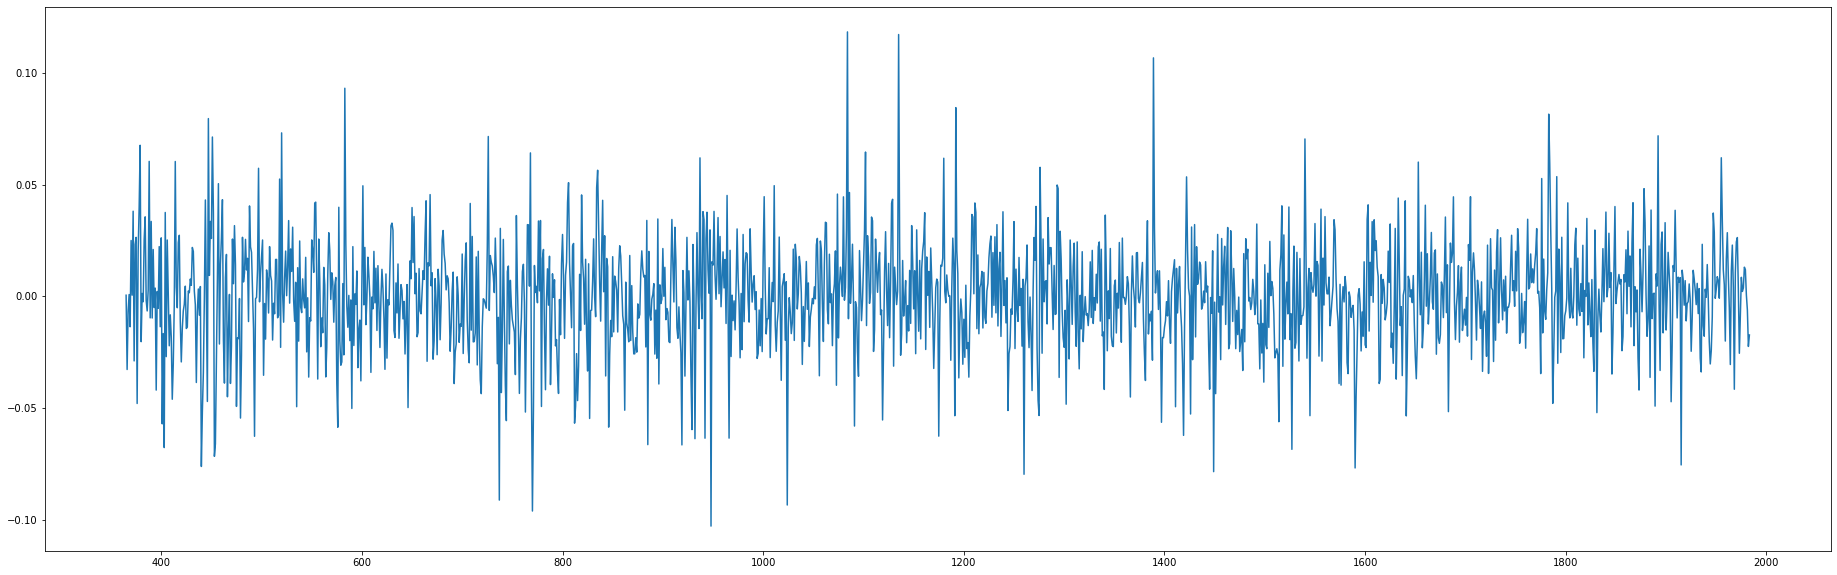

In [155]:
df["company_stock_final"].plot(figsize=(32,10))

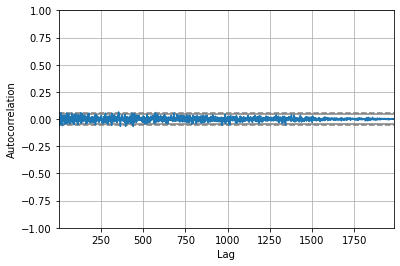

In [156]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Comp Stock'])
plt.show()

In [157]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [158]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments,company_stock,company_stock_final
0,31-12-2009,0.025417,0.000150,0.017354,0.006848,NaN,NaN
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609,-0.001789,NaN
2,05-01-2010,0.002699,0.001560,0.001729,0.005900,-0.013836,NaN
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116,-0.017635,NaN
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013,0.014058,NaN


In [159]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
# Usually in seasonal data we avoid arima ,just showing u how to impliment
from statsmodels.tsa.arima_model import ARIMA

In [160]:
import warnings 
warnings.filterwarnings('ignore')
model=ARIMA(df['Comp Stock'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()

In [161]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Comp Stock   No. Observations:                 1983
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5373.983
Method:                       css-mle   S.D. of innovations              0.016
Date:                Sat, 31 Oct 2020   AIC                         -10739.966
Time:                        22:20:25   BIC                         -10717.596
Sample:                             1   HQIC                        -10731.749
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -8.868e-08    6.5e-06     -0.014      0.989   -1.28e-05    1.26e-05
ar.L1.D.Comp Stock     0.0284      0.023      1.217      0.224      -0.017       0.074
ma.L1.D.Comp Stock    -0.9831      0.013    -73.357      0.000      -1.009      -0.957
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           35.2596           +0.0000j           35.2596            0.0000
MA.1            1.0172           +0.0000j            1.0172            0.0000
-----------------------------------------------------------------------------
"""

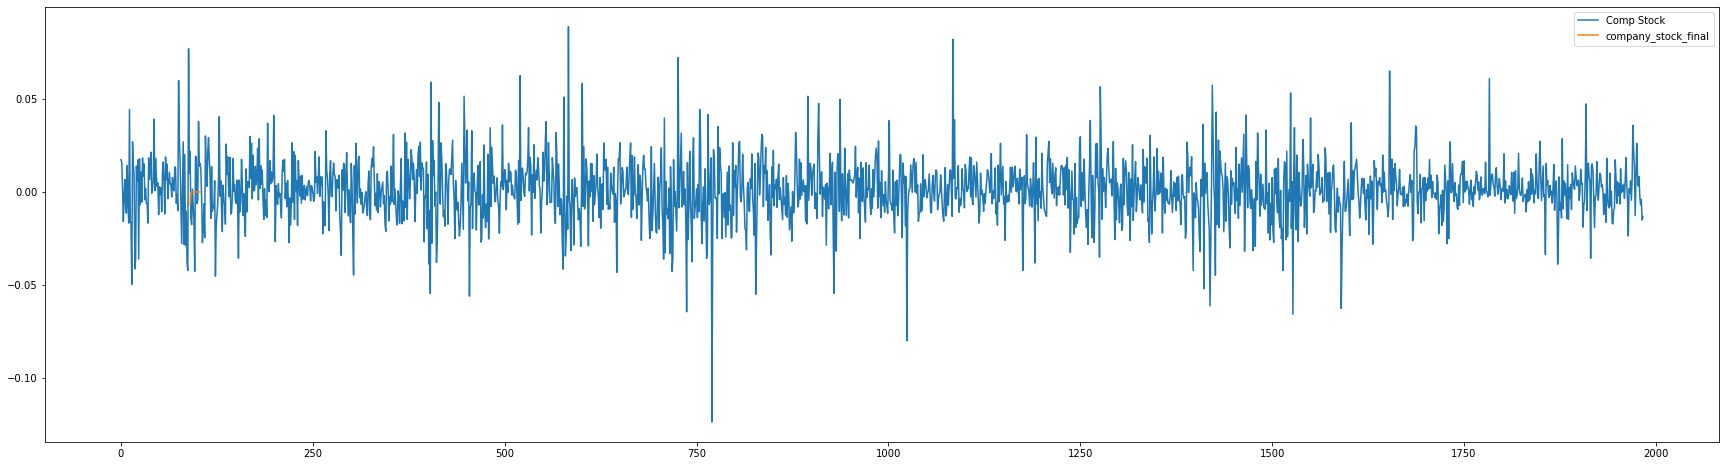

In [163]:
df['company_stock_final']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Comp Stock','company_stock_final']].plot(figsize=(30,8))